In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
# Function for univariate analysis in a grid format
def univariate_analysis_grid(df):
    analysis_results_numeric = []
    analysis_results_categorical = []

    for column in df.columns:
        column_analysis = {}
        column_analysis['Attribute'] = column

        # get type of column




        if pd.api.types.is_numeric_dtype(df[column]):
            # Numeric attribute analysis
            column_analysis['Type'] = 'Numeric'
            description = df[column].describe()
            column_analysis.update(description.to_dict())
            column_analysis['Skewness'] = df[column].skew()
            column_analysis['Kurtosis'] = df[column].kurtosis()
            column_analysis['Missing Values'] = df[column].isnull().sum()
            column_analysis['Missing Percentage'] = round(df[column].isnull().sum() / len(df) * 100, 1)

            analysis_results_numeric.append(column_analysis)

        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == object:
            # Categorical attribute analysis
            column_analysis['Type'] = 'Categorical'
            description = df[column].describe()
            column_analysis.update(description.to_dict())
            column_analysis['Unique Categories'] = df[column].nunique()
            column_analysis['Missing Values'] = df[column].isnull().sum()
            column_analysis['Missing Percentage'] = round(df[column].isnull().sum() / len(df) * 100, 1)
            analysis_results_categorical.append(column_analysis)

        else:
            print(f'Attribute {column} is not numeric or categorical. Skipping...')
            continue

    analysis_numeric_df = pd.DataFrame(analysis_results_numeric)
    analysis_categorical_df = pd.DataFrame(analysis_results_categorical)
                                           
    return analysis_numeric_df, analysis_categorical_df

In [ ]:
# Set plot styles
sns.set(style="whitegrid")

# Function for univariate analysis
def univariate_analysis(df, show_stats=True, show_plot=True):
    for column in df.columns:
        print(f'\n\nAnalyzing attribute: {column}')
        print('-' * 50)

        if pd.api.types.is_numeric_dtype(df[column]):

            if show_stats:
                # Numeric attribute analysis
                print('Type: Numeric\n')
                print(df[column].describe())
                print(f'Skewness: {df[column].skew():.2f}')
                print(f'Kurtosis: {df[column].kurtosis():.2f}')

                # print missing value as a percentage
                missing = df[column].isnull().sum()
                print(f'Missing Values: {missing} ({missing / len(df) * 100:.2f}%)')

            if show_plot:
                fig, axes = plt.subplots(1, 3, figsize=(18, 4))

                # Histogram
                sns.histplot(df[column].dropna(), kde=False, bins=30, ax=axes[0])
                axes[0].set_title(f'Histogram of {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[1])
                axes[1].set_title(f'Boxplot of {column}')

                # Density plot
                sns.kdeplot(df[column].dropna(), ax=axes[2], fill=True)
                axes[2].set_title(f'Density Plot of {column}')

                plt.tight_layout()
                plt.show()

        elif pd.api.types.is_categorical_dtype(df[column]) or df[column].dtype == object:
            
            if show_stats:
                # Categorical attribute analysis
                print('Type: Categorical\n')
                print(df[column].describe())
                print(f'Number of unique categories: {df[column].nunique()}')

                missing = df[column].isnull().sum()
                print(f'Missing Values: {missing} ({missing / len(df) * 100:.2f}%)')

            if show_plot:
                fig, axes = plt.subplots(1, 2, figsize=(14, 5))

                # Count plot
                sns.countplot(y=df[column], order=df[column].value_counts().index[:15], ax=axes[0])
                axes[0].set_title(f'Count plot of top categories in {column}')            

                # Pie chart
                top_categories = df[column].value_counts().nlargest(10)
                axes[1].pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
                axes[1].set_title(f'Pie Chart of top categories in {column}')

                plt.tight_layout()
                plt.show()

        else:
            print('Type: Unsupported or unknown attribute type.')




## Task 1

### Question to answer
*Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).*

I want to determine which attributes contribute to making features for a model to predicting whether a customer is likely to subscribe to a term deposit, identify low impact or highly correlated attributes for potential to drop, saving computing resources.  Finally I want to look at the potential of creating new features from the attributes to achieve my goal

### Univariate 
Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

In [41]:
# Run the analysis and display the results
analysis_numeric_df, analysis_categorical_df = univariate_analysis_grid(df)
display(analysis_numeric_df)
display(analysis_categorical_df)

,Attribute,Type,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Missing Values,Missing Percentage
0,age,Numeric,1979.0,41.691258,12.665694,18.0,32.0,38.0,50.0,93.0,0.846138,0.371184,12,0.6
1,balance,Numeric,1991.0,1269.131592,1969.031621,-980.0,199.0,547.0,1623.5,17946.0,3.447738,16.416161,0,0.0
2,day,Numeric,1991.0,13.853340,9.716307,1.0,5.0,12.0,23.0,31.0,0.404176,-1.287615,0,0.0
3,duration,Numeric,1991.0,291.819689,221.708957,7.0,146.0,236.0,377.5,1823.0,2.051263,6.315778,0,0.0
4,campaign,Numeric,1991.0,1.906580,1.374686,1.0,1.0,1.0,2.0,11.0,2.328129,7.245155,0,0.0
5,pdays,Numeric,1991.0,168.317428,131.871125,-1.0,75.5,182.0,251.0,854.0,0.914858,2.701432,0,0.0
6,previous,Numeric,1991.0,2.560020,3.405330,0.0,1.0,2.0,3.0,55.0,5.464116,59.699428,0,0.0


,Attribute,Type,count,unique,top,freq,Unique Categories,Missing Values,Missing Percentage
0,job,Categorical,1981,11,management,456,11,10,0.5
1,marital,Categorical,1991,3,married,1106,3,0,0.0
2,education,Categorical,1887,3,secondary,994,3,104,5.2
3,default,Categorical,1991,2,no,1976,2,0,0.0
4,housing,Categorical,1991,2,no,1029,2,0,0.0
5,loan,Categorical,1991,2,no,1741,2,0,0.0
6,contact,Categorical,1800,2,cellular,1655,2,191,9.6
7,month,Categorical,1991,12,feb,403,12,0,0.0
8,poutcome,Categorical,1539,3,failure,953,3,452,22.7
9,subscribed,Categorical,1991,2,no,998,2,0,0.0


### Ststisical analysis
#### Numeric attributes
**Missing Values**
* Age has a very minor amount of missing data which can be replaced with the median age
* pdays has no missing values, but we know that -1 means not previously contacted.  We may want to capture this in a new attribute (previously contacted: True/False)

**Distribution & outliers**
* Age shows a resonable distribution with the mean just slightly higher than the median
* Balance, duration, campaign and previous show a high skewness with significant outliers
* pdays needs special consideration

**Other considerations**
* Day - from the data day seems to be day of the month and has a comarabily even spread.  Note this mistakenly marked down as day-of-week in the data dictionary.  We may want to consider this as catagorical as the number is more of a label than a score
* Duration - We are told that this column shouldn't be used as a feature as the data is not available ahead of time.

#### Categorical attributes**
**Missing Values**
* poutcome - has a 23% ratio of missing values.  Although this is a large percentage of missing data and a potential candidate for dropping, I am inclined to leave it and add a new unknown category to handle the missing data.
* contact - 10% missing values.  We will also likely add a category called 'unknown' to the current cellular or telephone
* education & job - 5% & 0.5% missing respectively, also substitute with new unknown category

**Variablity**
* default has value no for almost the entire dataset
* loan also has no for over 85% of the data
* Target variable subscribed is almost exactly split down the middle which is good for classification modelling purposes

### Plot distributions
Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).



Analyzing attribute: age
--------------------------------------------------


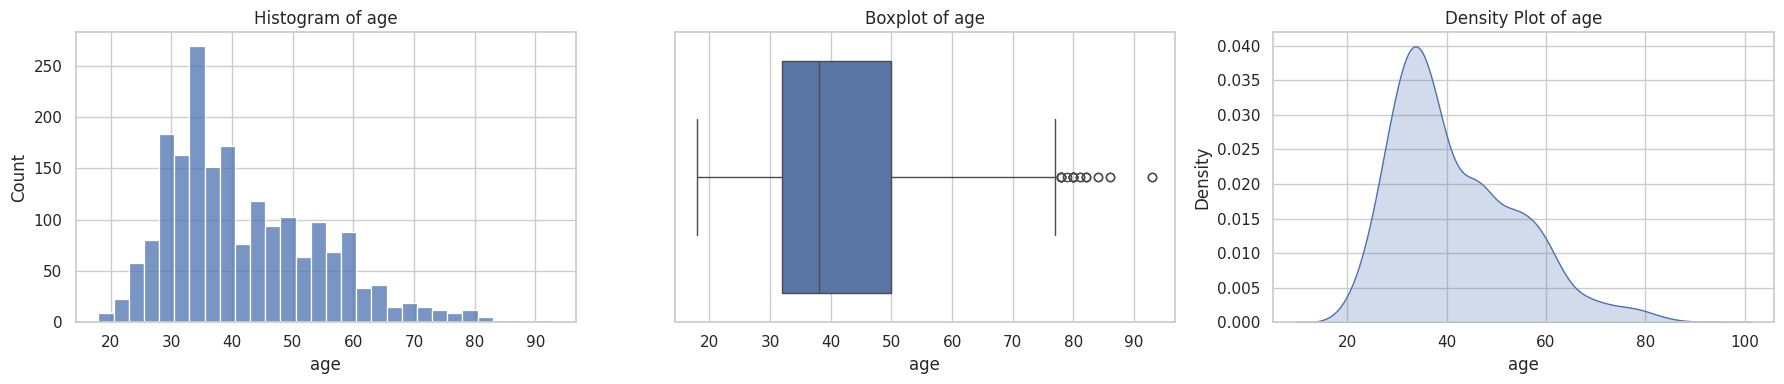



Analyzing attribute: balance
--------------------------------------------------


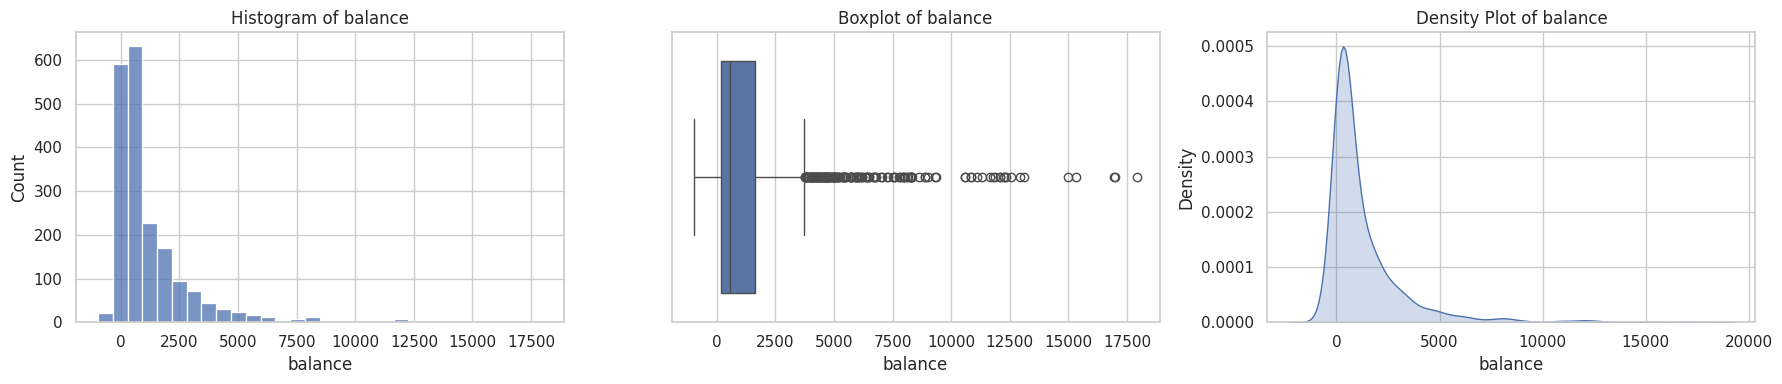



Analyzing attribute: day
--------------------------------------------------


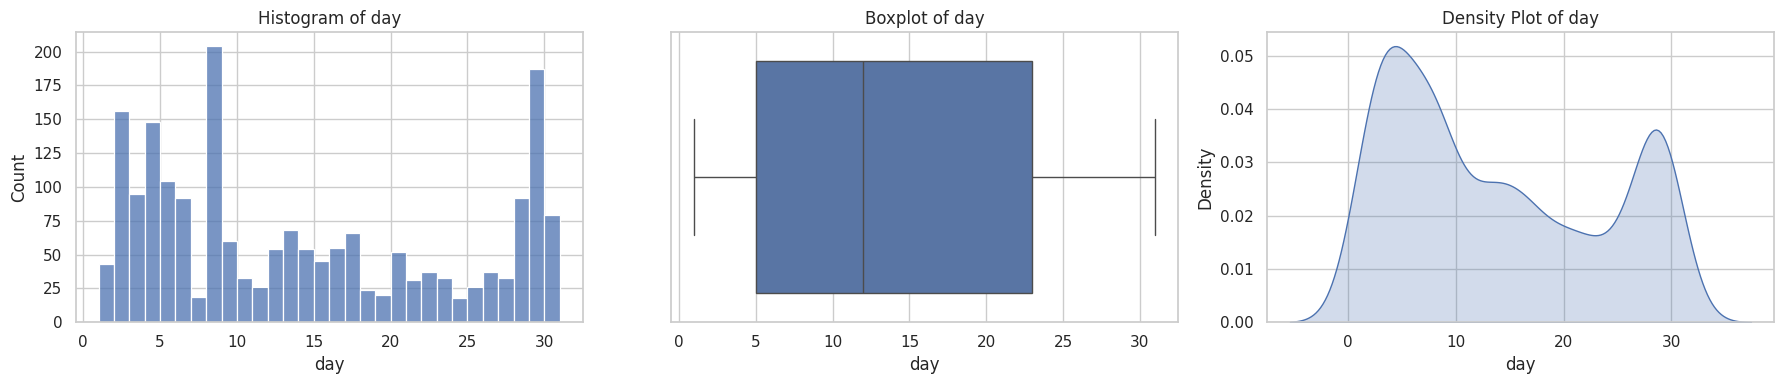



Analyzing attribute: duration
--------------------------------------------------


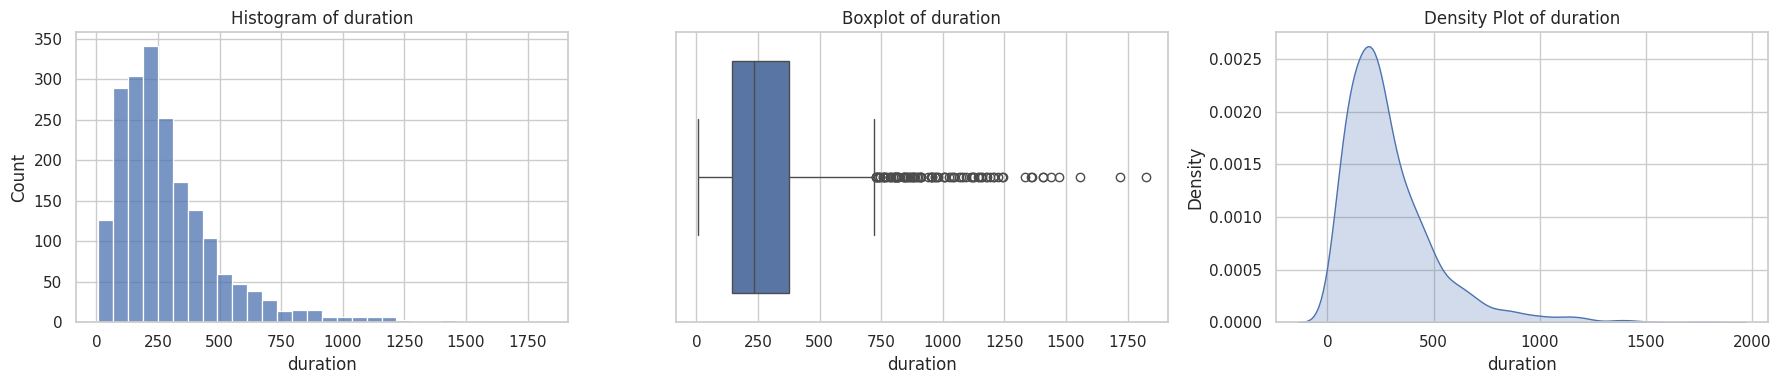



Analyzing attribute: campaign
--------------------------------------------------


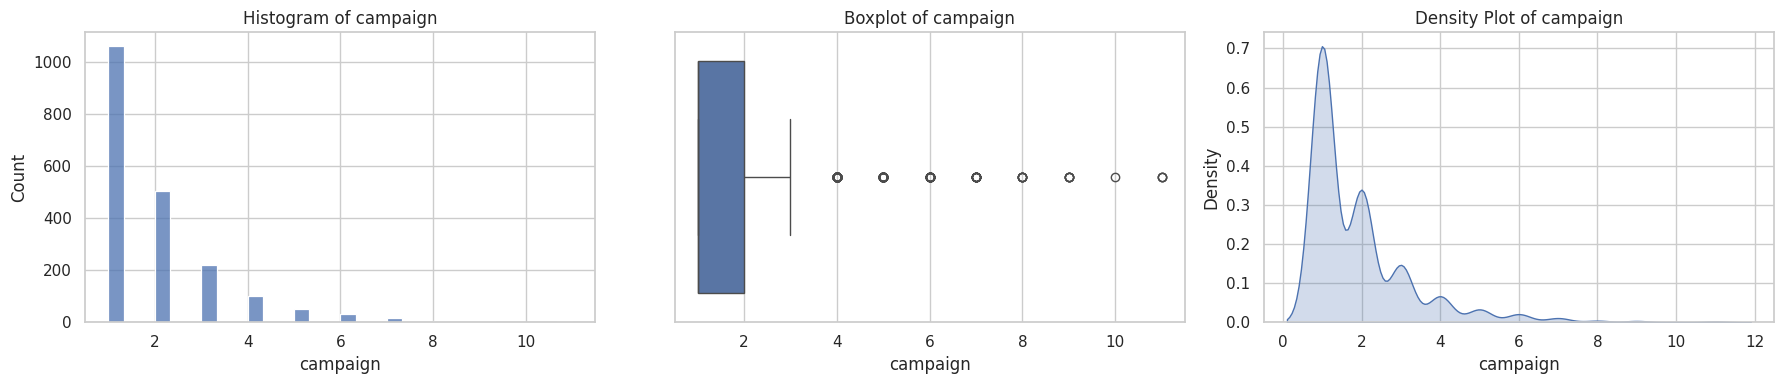



Analyzing attribute: pdays
--------------------------------------------------


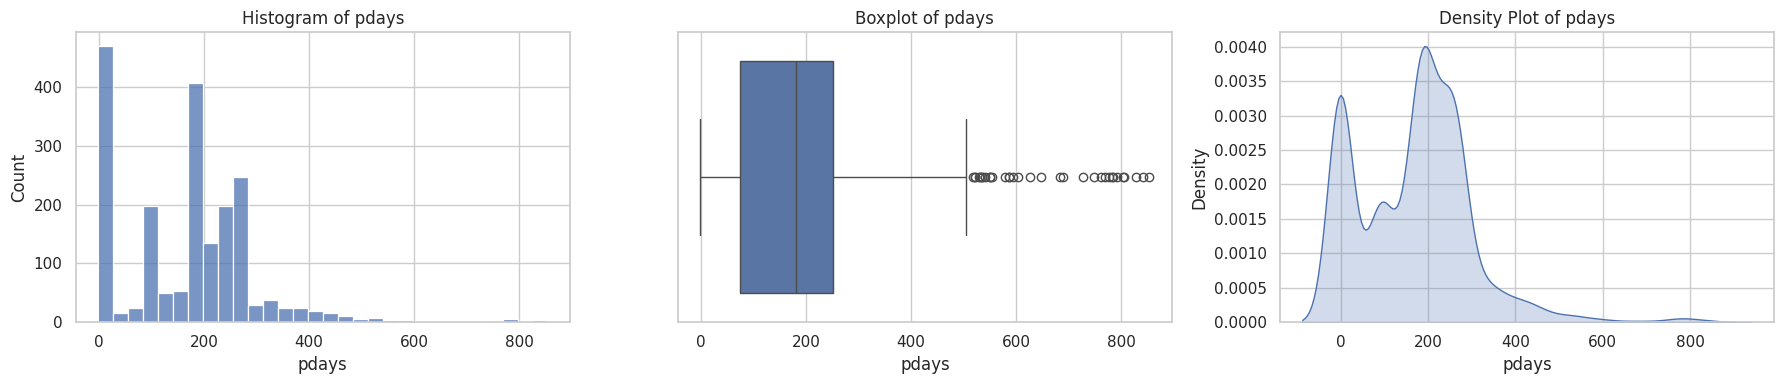



Analyzing attribute: previous
--------------------------------------------------


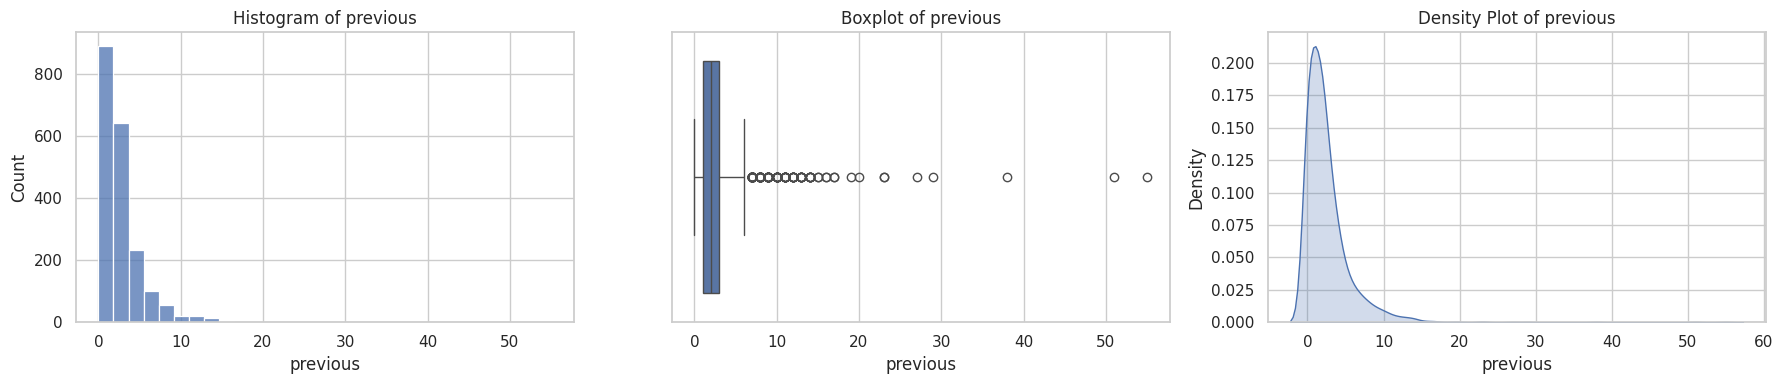

In [44]:
# select the numeric columns as a dataframe
numeric_columns = df.select_dtypes(include=[np.number])



univariate_analysis(numeric_columns, show_stats=False)

### Plot combined distributions
Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).

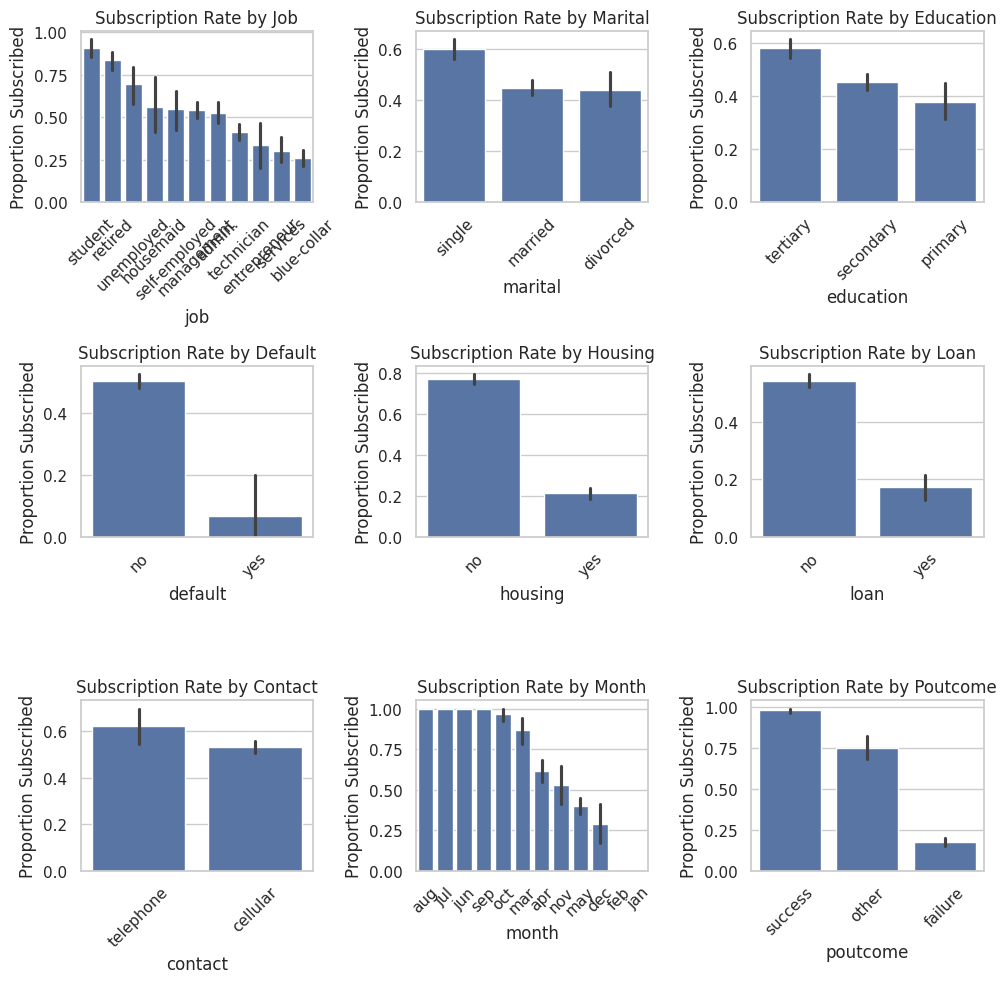

In [46]:
# add a version of subscribed from "yes" and "no" to 1 and 0
df['subscribed_num'] = df['subscribed'].apply(lambda x: 1 if x == 'yes' else 0)

df_cat = df.select_dtypes(include=[object])

# remove subscription category from the df_cat dataframe
df_cat = df_cat.drop('subscribed', axis=1)



fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(df_cat.columns):
    order = df.groupby(col)['subscribed_num'].mean().sort_values(ascending=False).index
    sns.barplot(data=df, x=col, y='subscribed_num', estimator=np.mean, ax=axes[i], order=order)
    axes[i].set_xticks(axes[i].get_xticks())
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_title(f'Subscription Rate by {col.capitalize()}')
    axes[i].set_ylabel('Proportion Subscribed')

plt.tight_layout()
plt.show()

contact_weekday
0    0.010870
1    1.000000
2    0.994083
3    0.494145
4    0.684375
5    0.595420
6    0.387654
Name: subscribed_num, dtype: float64


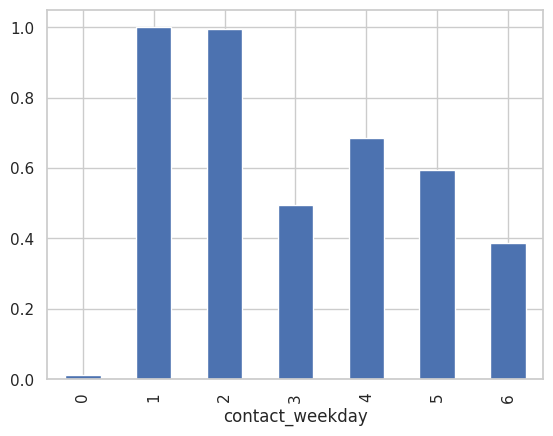

In [48]:
from datetime import datetime

# combine day and month columns into a single column, skip any missing values
df['contact_date'] = df['day'].astype(str) + '_' + df['month']


# Map month abbreviations to numeric months
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

def parse_date_to_weekday(date_str):
    # Split by underscore -> ['17', 'feb']
    day_str, month_str = date_str.split('_')
    day = int(day_str)
    month = month_map[month_str]
    
    # Use an arbitrary year, e.g., 2023
    dt = datetime(2023, month, day)
    # weekday(): Monday=0, Sunday=6; or use strftime('%A') for the name
    return dt.weekday()

# extract contact date as a string array.  Apply the function to each date
df['contact_weekday'] = df['contact_date'].apply(parse_date_to_weekday)

# create a bar plot of the subscription rate by contact weekday order by weekday
df.groupby('contact_weekday')['subscribed_num'].mean().plot(kind = 'bar')

# display the subscription rate for each weekday
print(df.groupby('contact_weekday')['subscribed_num'].mean())

## Task 2

### Encode categorical attributes

### Fill in missing values

### Scale values

### Handle outliers & skewed distributions

### New features

### Conclusion